In [1]:
import tensorflow as tf
from icnr import ICNR
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [3]:
def renorm(a):
    std = 255.0/(a.max() - a.min())
    return (a - a.min())*std

def prepare(w):
    t = tf.transpose(w, perm = [2, 0, 1, 3] )
    t = tf.depth_to_space(t, 2)[0,:,:,:3]
    return t

In [4]:
w = tf.glorot_normal_initializer()(shape=[5,5,32,64], dtype=tf.float32)
w_icnr = ICNR(tf.glorot_normal_initializer(), scale=2)(shape=[5,5,32,64], dtype=tf.float32)

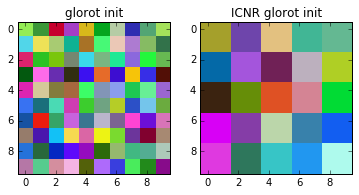

In [5]:
w1 = renorm(prepare(w).eval())
w2 = renorm(prepare(w_icnr).eval())
plt.subplot(1,2,1)
plt.imshow(w1, interpolation='nearest')
plt.title("glorot init")
plt.subplot(1,2,2)
plt.imshow(w2, interpolation='nearest')
plt.title("ICNR glorot init")